# Bank HR Marketing

### Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input,Add,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D,AveragePooling2D,MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD
sns.set()

### Data

In [2]:
credit_df = pd.read_csv('Marketing_data.csv')

In [4]:
credit_df.head()
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Missing data

In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

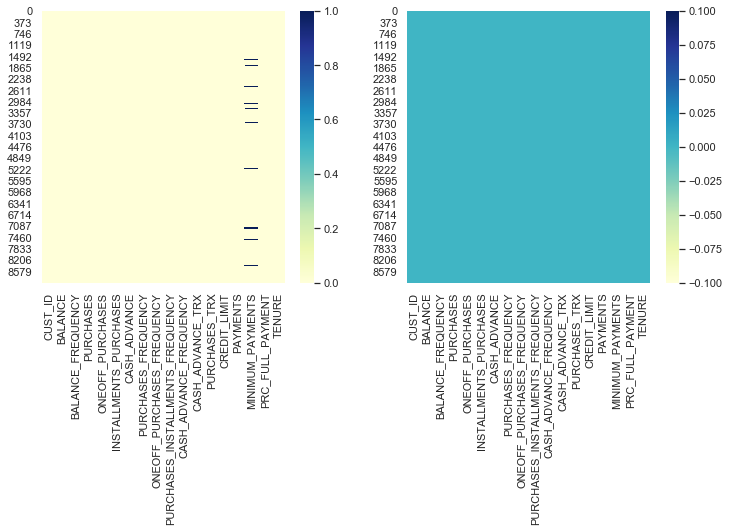

In [8]:
f, axes = plt.subplots(1, 2,figsize = (12,5))
sns.heatmap(credit_df.isnull(), cmap="YlGnBu", ax=axes[0])
credit_df.loc[credit_df['CREDIT_LIMIT'].isnull()== True,'CREDIT_LIMIT']=credit_df['CREDIT_LIMIT'].mean()
credit_df.loc[credit_df['MINIMUM_PAYMENTS'].isnull()== True,'MINIMUM_PAYMENTS']=credit_df['MINIMUM_PAYMENTS'].mean()
sns.heatmap(credit_df.isnull(), cmap="YlGnBu", ax=axes[1])

In [9]:
credit_df.duplicated().sum()

0

In [10]:
credit_df.drop('CUST_ID',axis =1,inplace=True)

In [11]:
credit_df.columns.values

array(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'], dtype=object)

### Distribution of features

/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

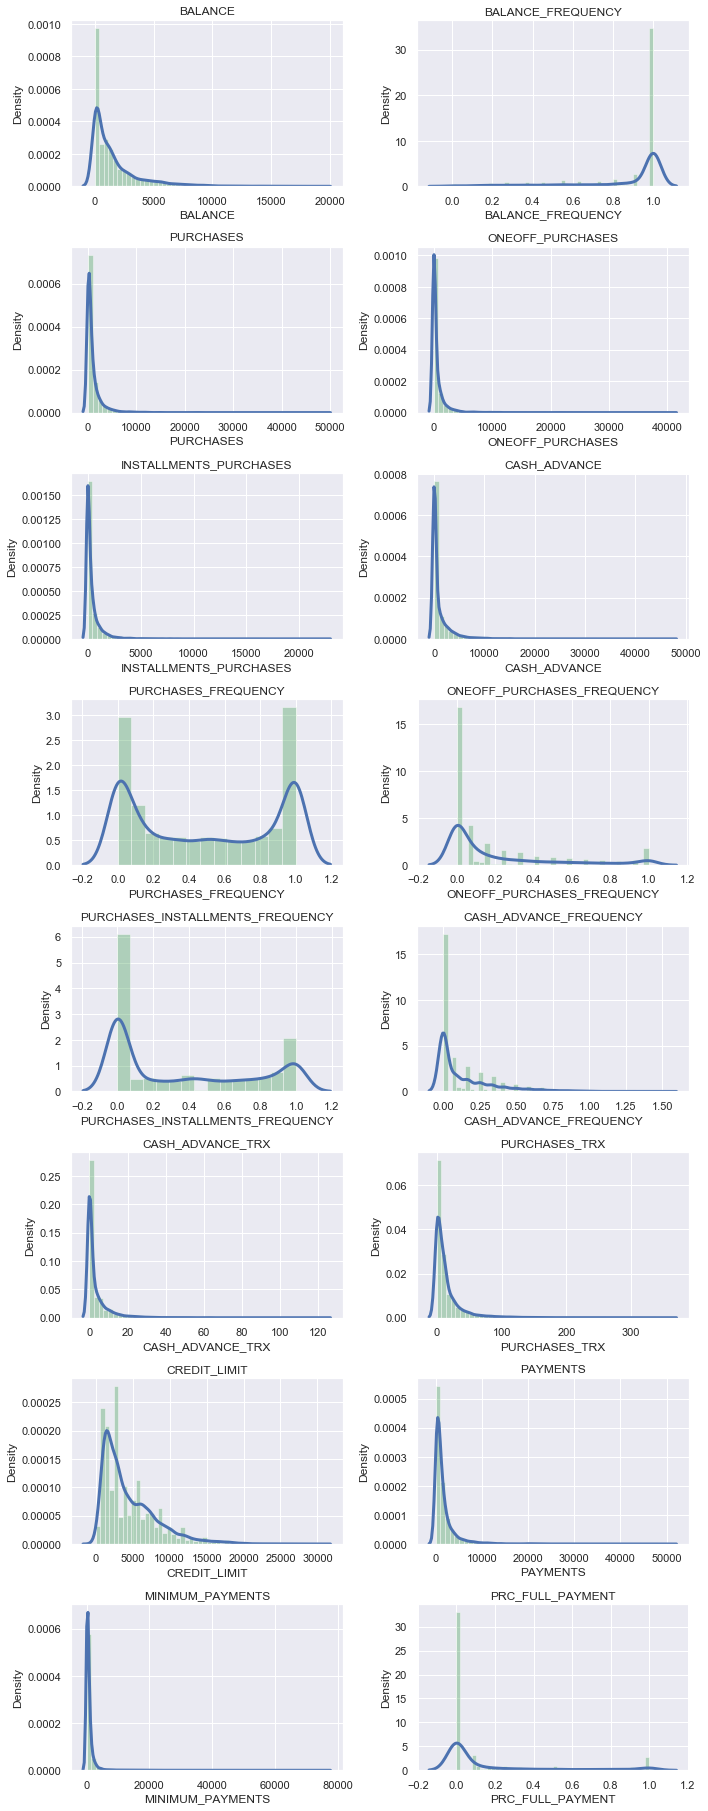

In [12]:
plt.figure(figsize=(10,50))
i = 1
for col_ in credit_df.columns:
    if col_ == 'TENURE':
        break
    plt.subplot(16, 2, i)
    sns.distplot(credit_df['{}'.format(col_)], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title('{}'.format(col_))
    i+=1
plt.tight_layout()

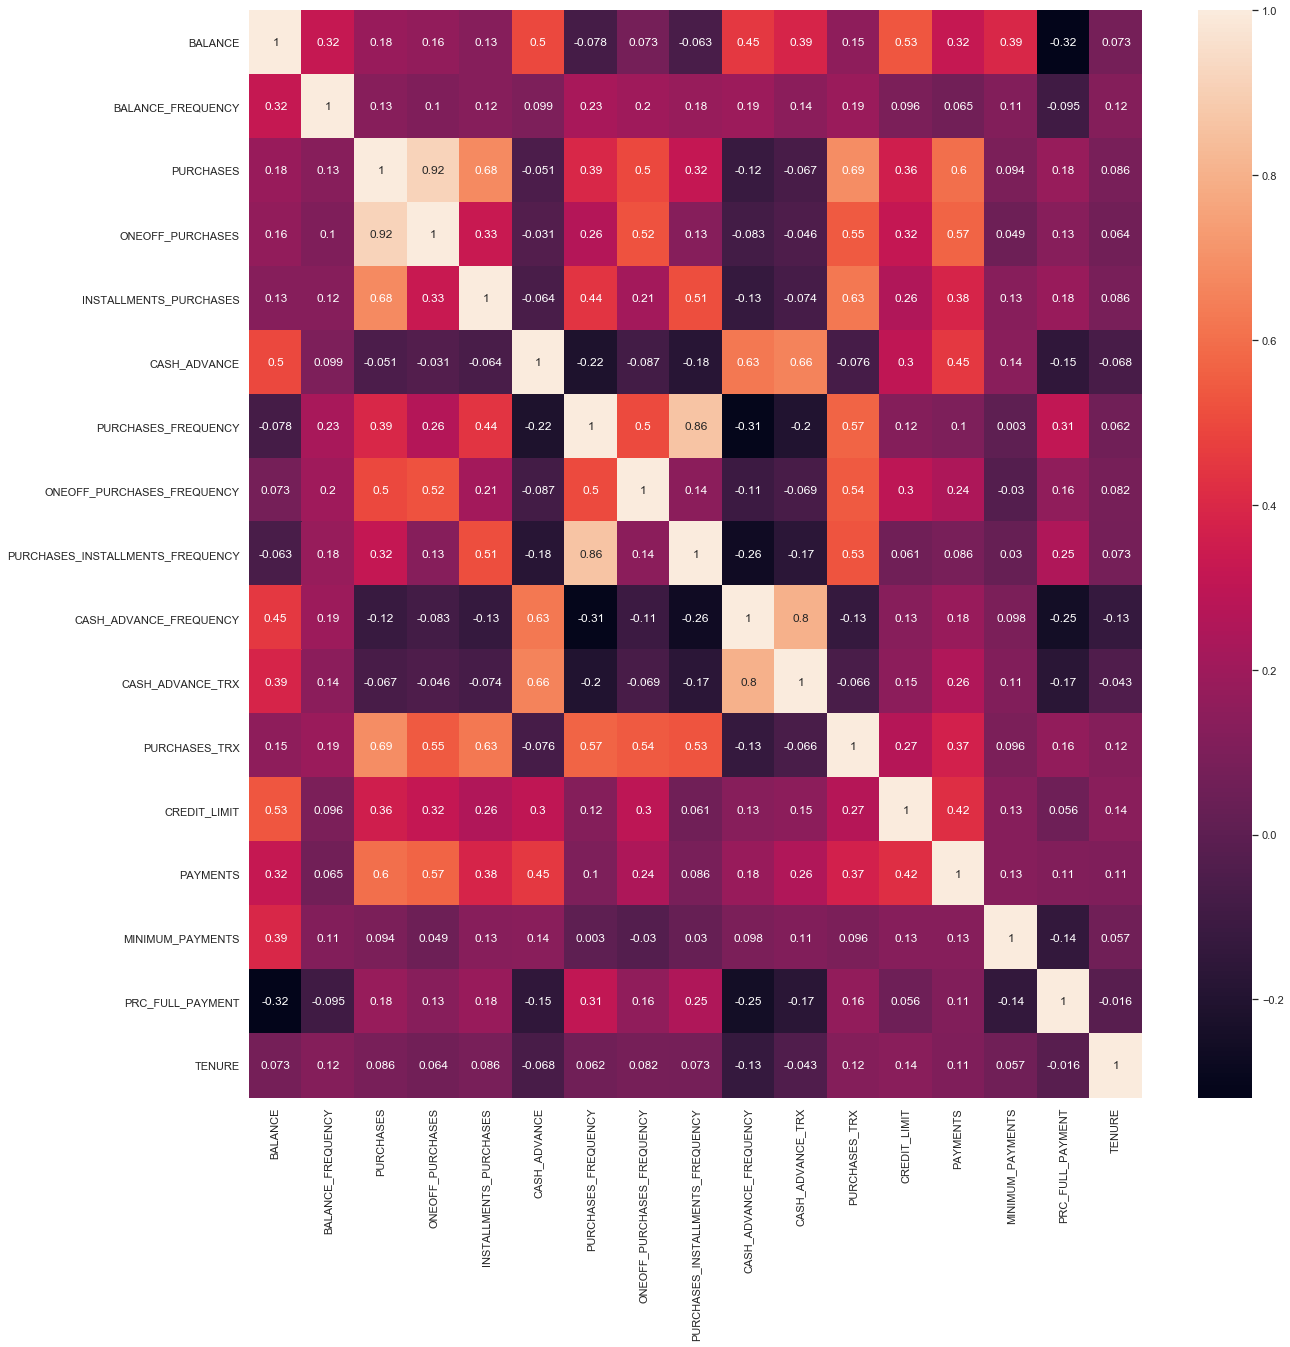

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(credit_df.corr(), annot=True)

# KMeans

In [16]:
scaler = StandardScaler()
credit_scaled_df = scaler.fit_transform(credit_df)

In [17]:
credit_scaled_df.shape

(8950, 17)

### Elbow Method

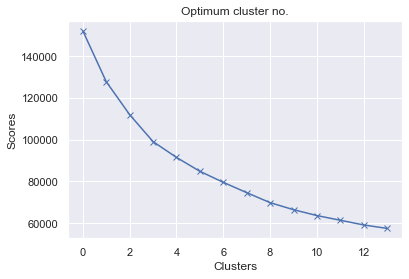

In [18]:
inertia_score = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(credit_scaled_df)
    inertia_score.append(kmeans.inertia_) 

plt.plot(inertia_score, 'bx-')
plt.title('Optimum cluster no.')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

### Applying KMeans method

In [19]:
kmeans = KMeans(8)
kmeans.fit(credit_scaled_df)
labels = kmeans.labels_

In [20]:
kmeans.cluster_centers_.shape

(8, 17)

In [21]:
cluster_centers_df = pd.DataFrame(data=scaler.inverse_transform(kmeans.cluster_centers_), columns = [credit_df.columns])
cluster_centers_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1229.969040,0.970121,1971.921929,1576.912894,395.009035,284.142985,0.867849,0.761404,0.399668,0.053978,1.056415,27.732484,5865.584416,1985.985980,487.309981,0.271572,11.866242
1,1605.235117,0.972921,228.796007,181.044908,47.932906,802.557593,0.141758,0.079471,0.062837,0.158836,3.119765,2.589273,3384.153808,1017.508944,845.074742,0.020323,11.880970
2,804.154457,0.956301,922.394559,186.583542,736.254112,213.228001,0.887830,0.086861,0.843724,0.039838,0.778770,19.363591,3545.595338,1102.571654,787.530493,0.245386,11.862103
3,104.875814,0.369955,338.647961,201.448528,137.450533,303.307732,0.267219,0.070296,0.189498,0.030866,0.681049,4.280034,3846.818481,1147.074774,265.804410,0.235741,11.784264
4,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
5,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
6,5110.868385,0.970572,541.915537,335.214685,206.819626,5235.234455,0.300877,0.139721,0.201406,0.520269,16.532710,8.148364,8277.400170,4137.031957,2169.860131,0.039001,11.612150
7,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539


In [22]:
credit_cluster_df = pd.concat([credit_df, pd.DataFrame({'CLUSTERS': labels})], axis=1)

In [23]:
credit_cluster_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,7
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,2
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,3


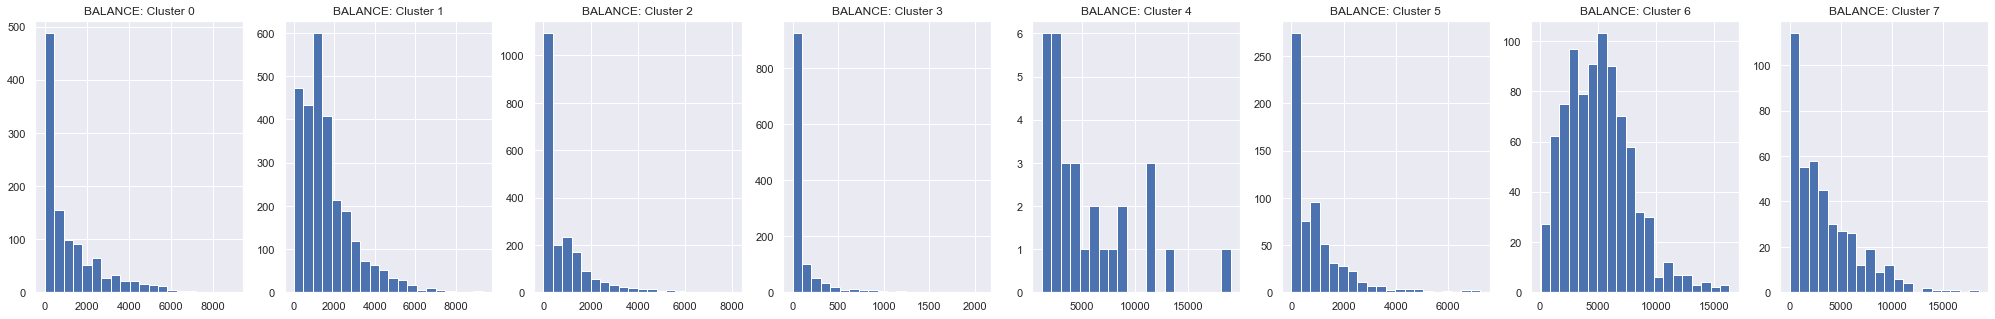

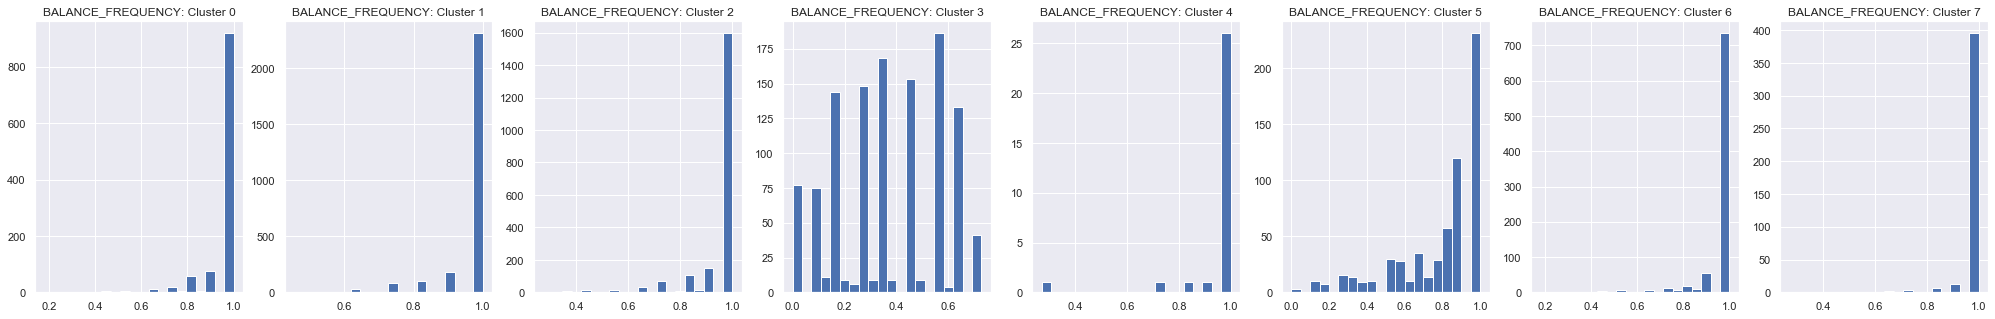

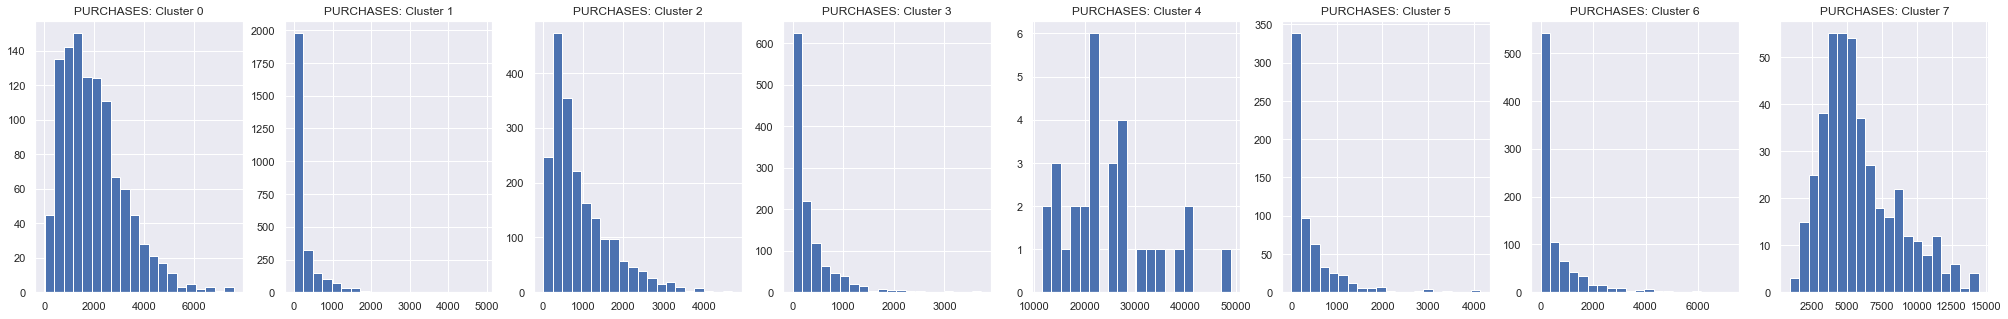

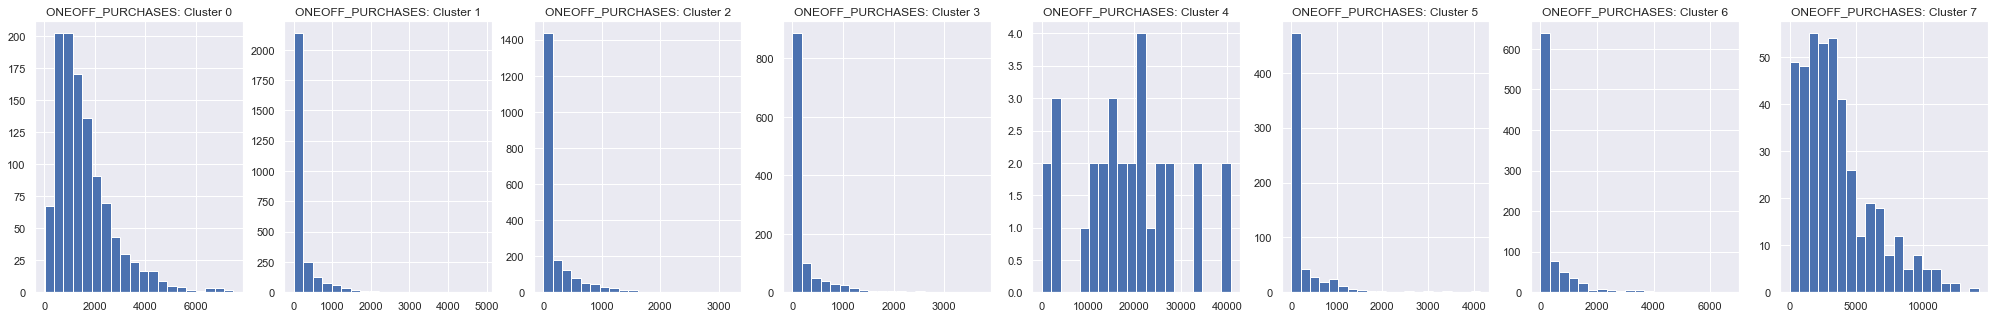

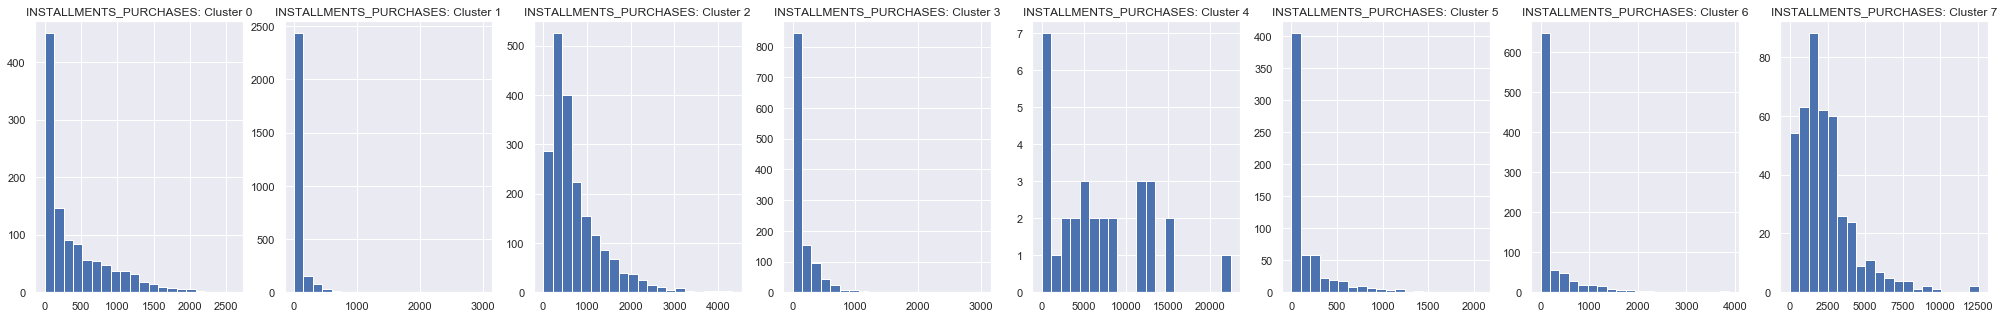

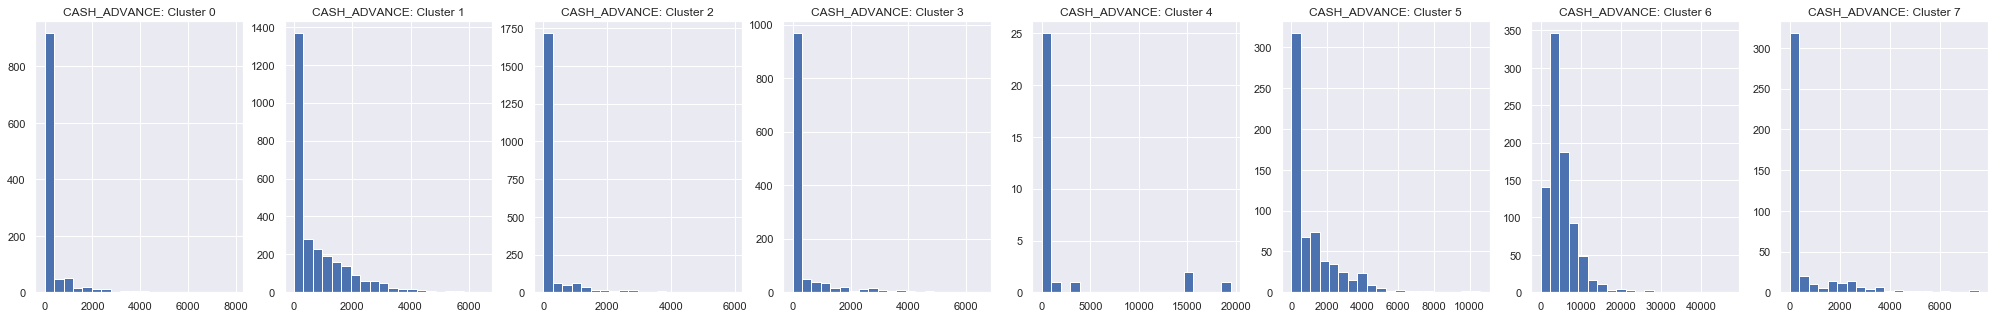

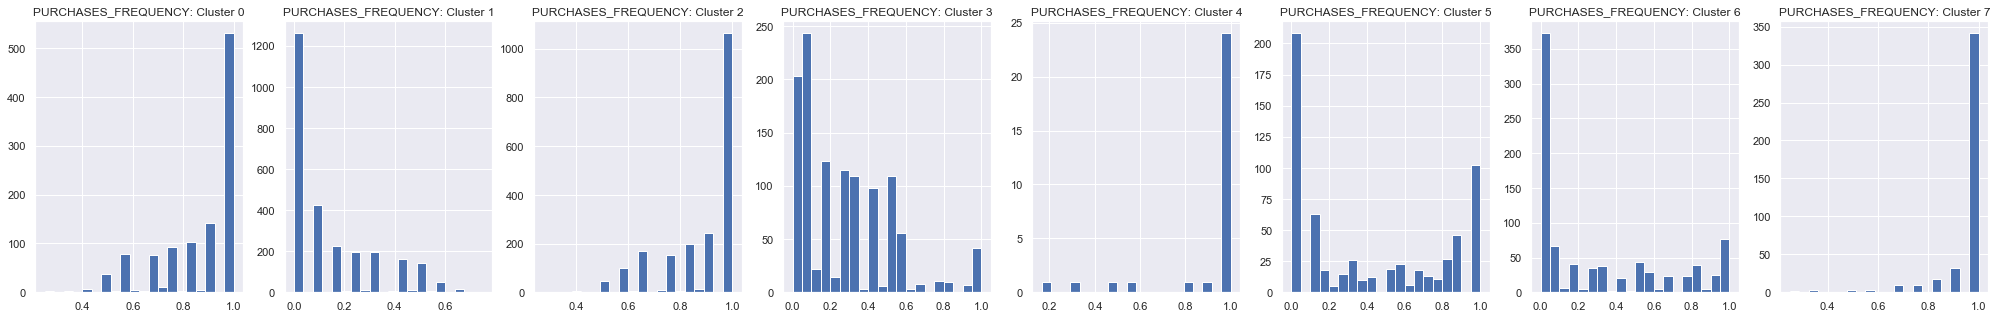

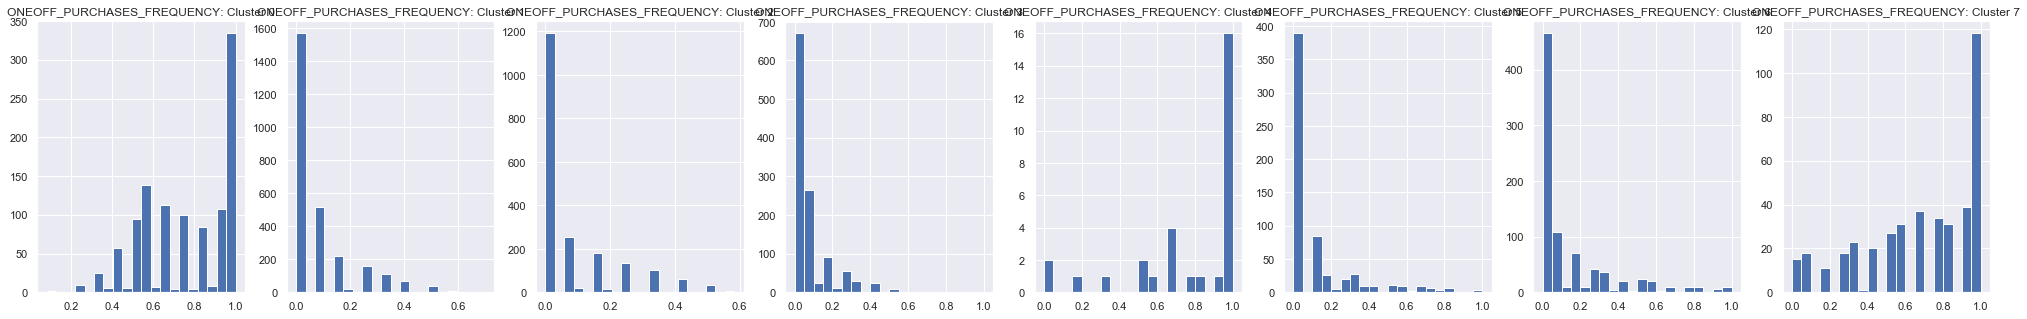

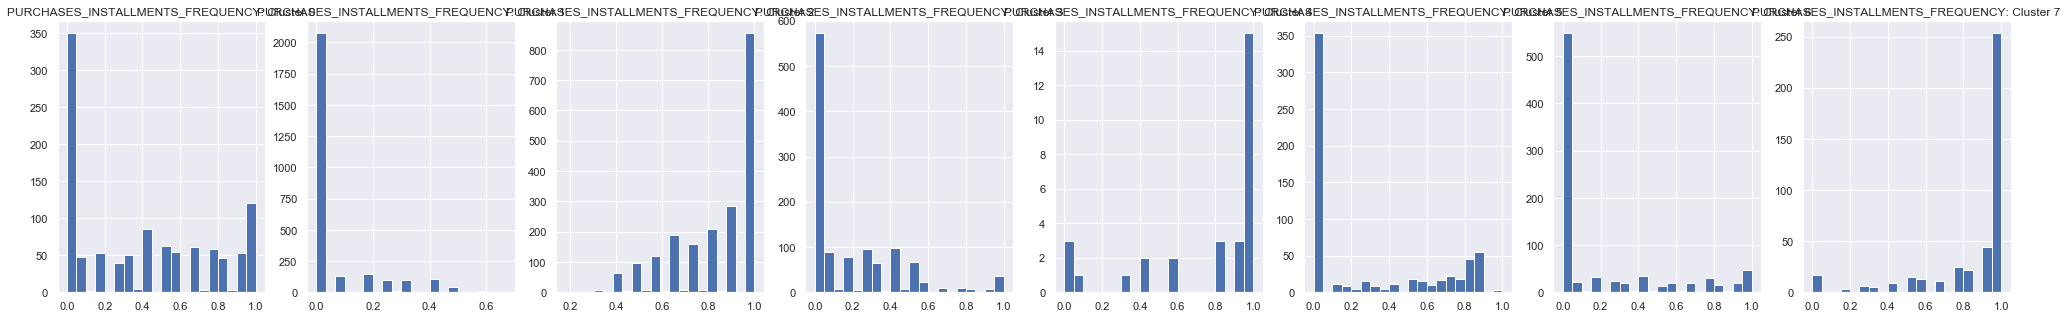

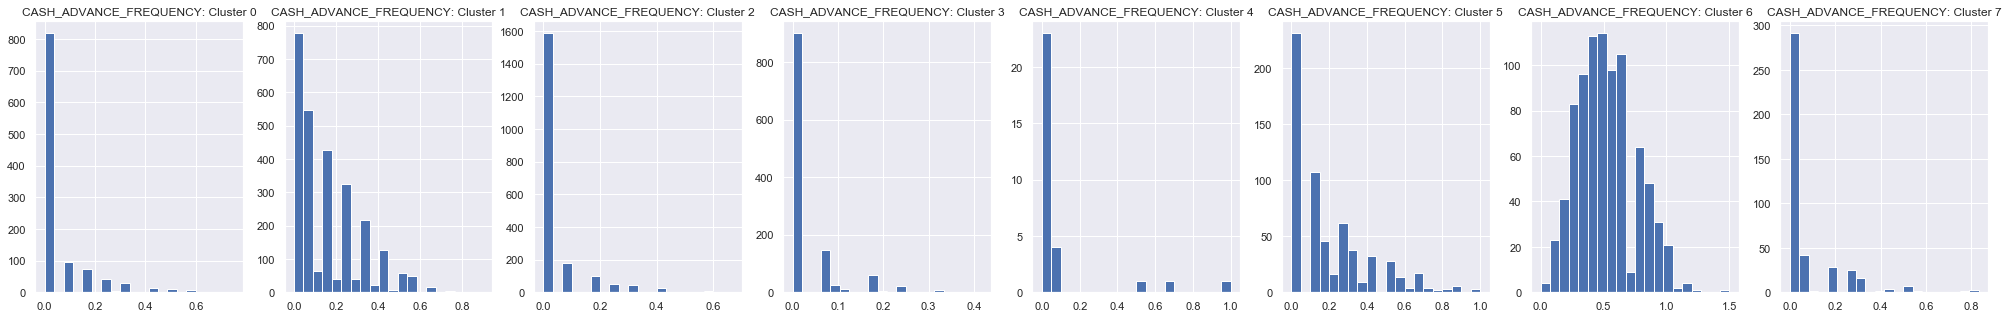

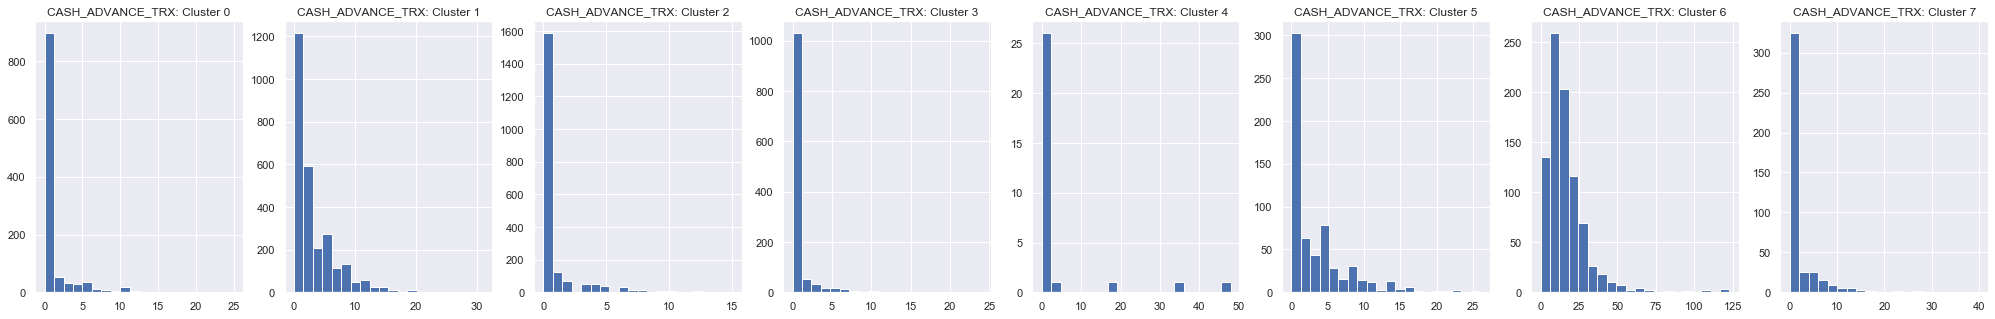

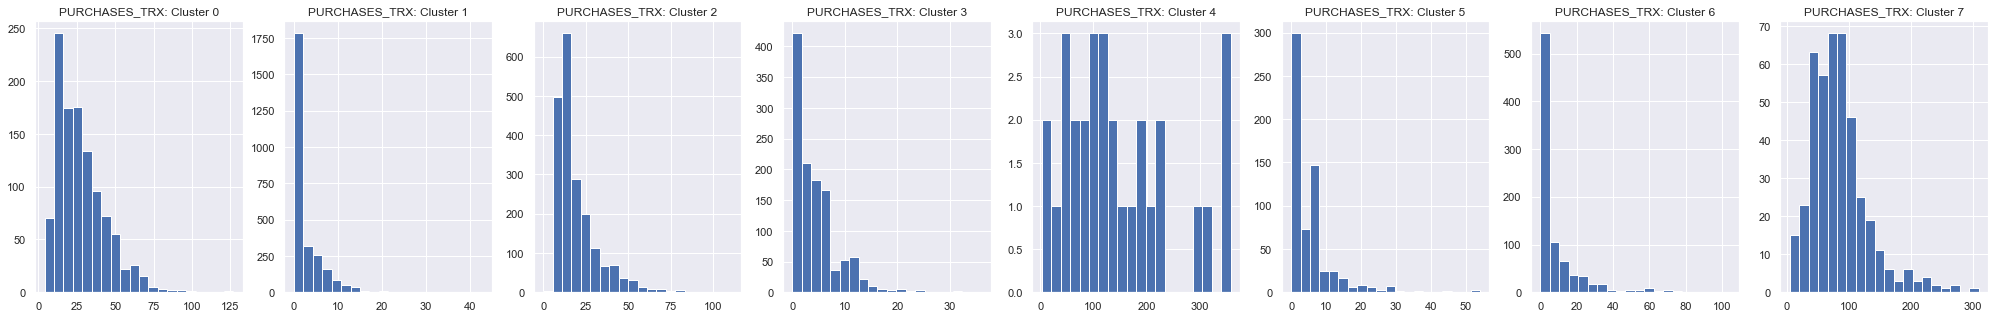

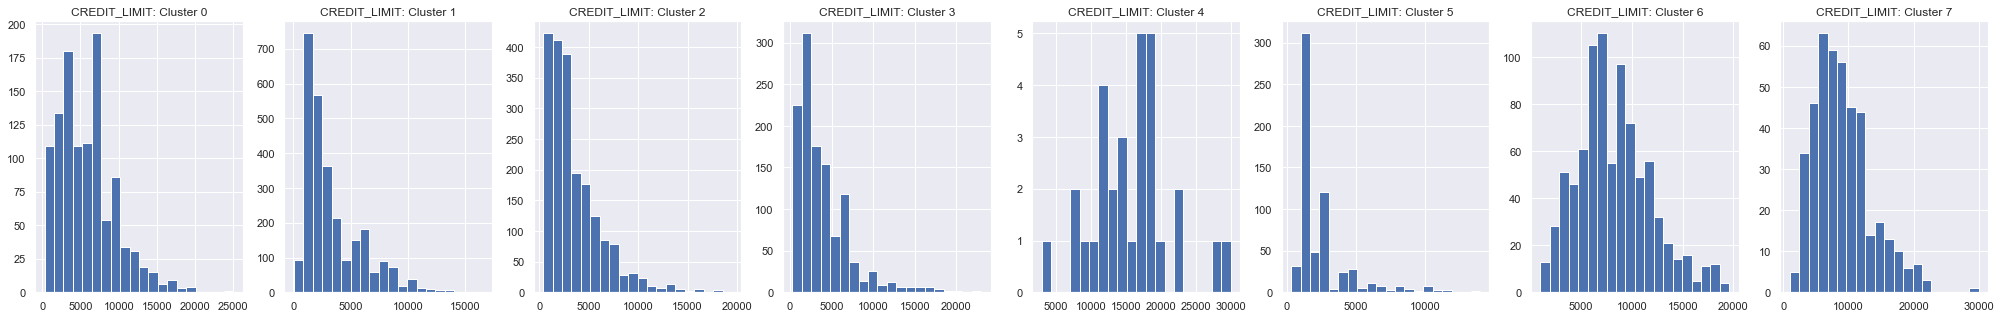

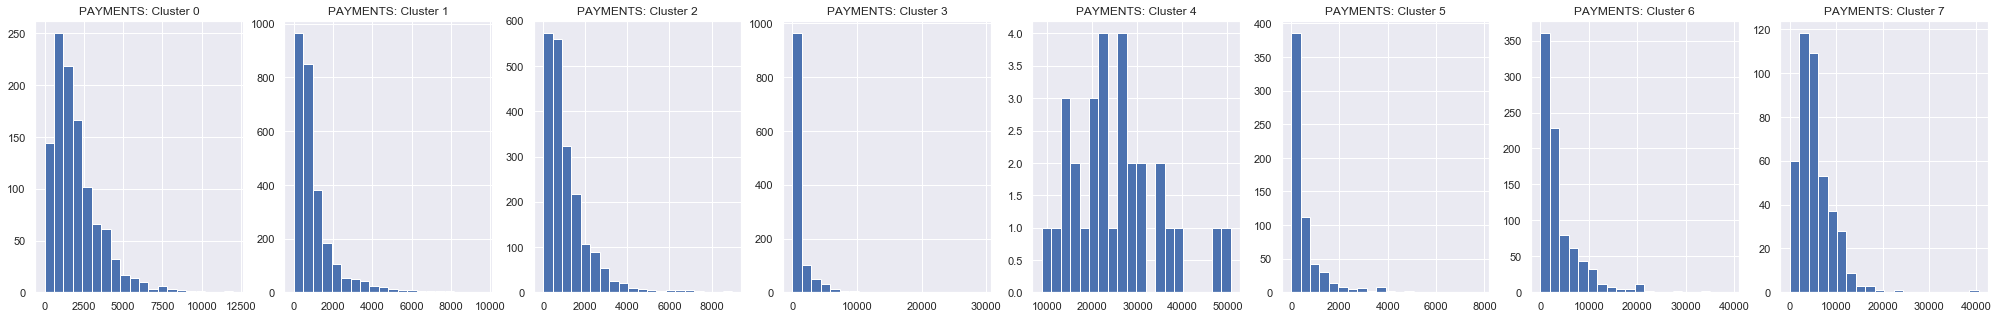

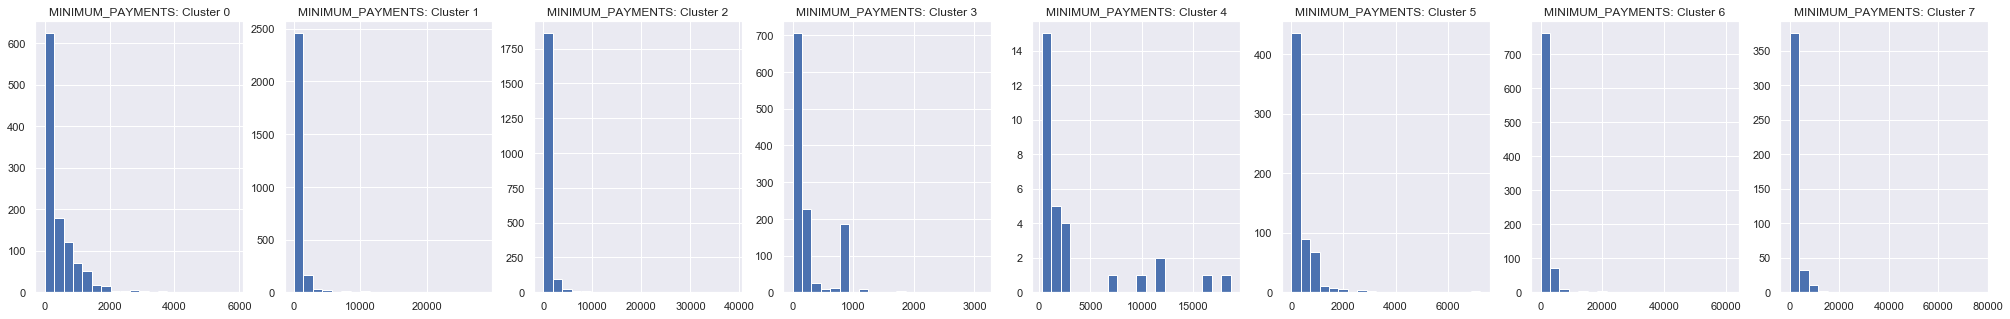

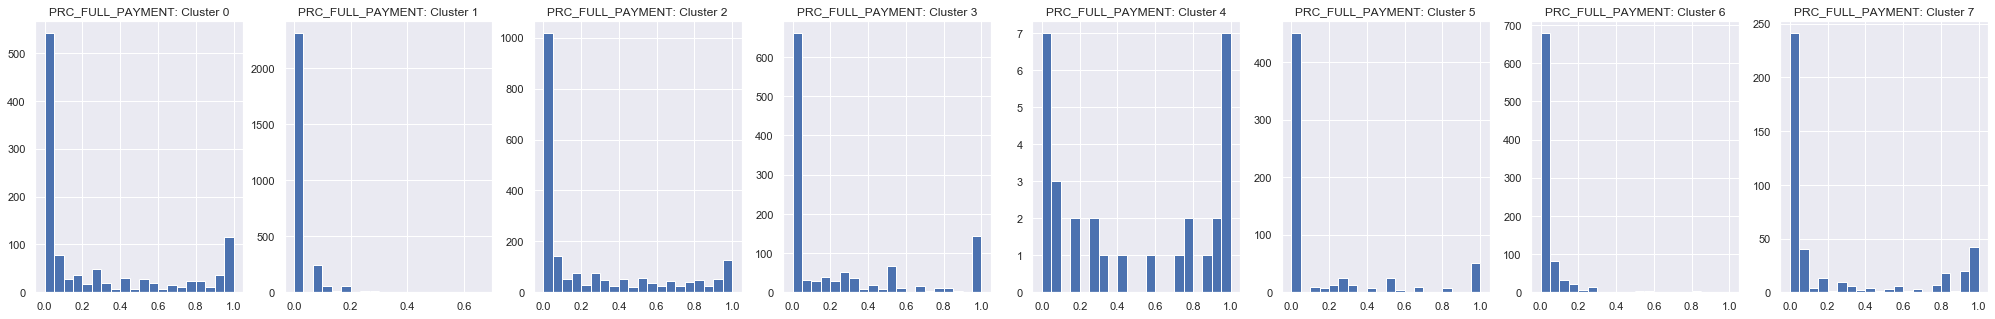

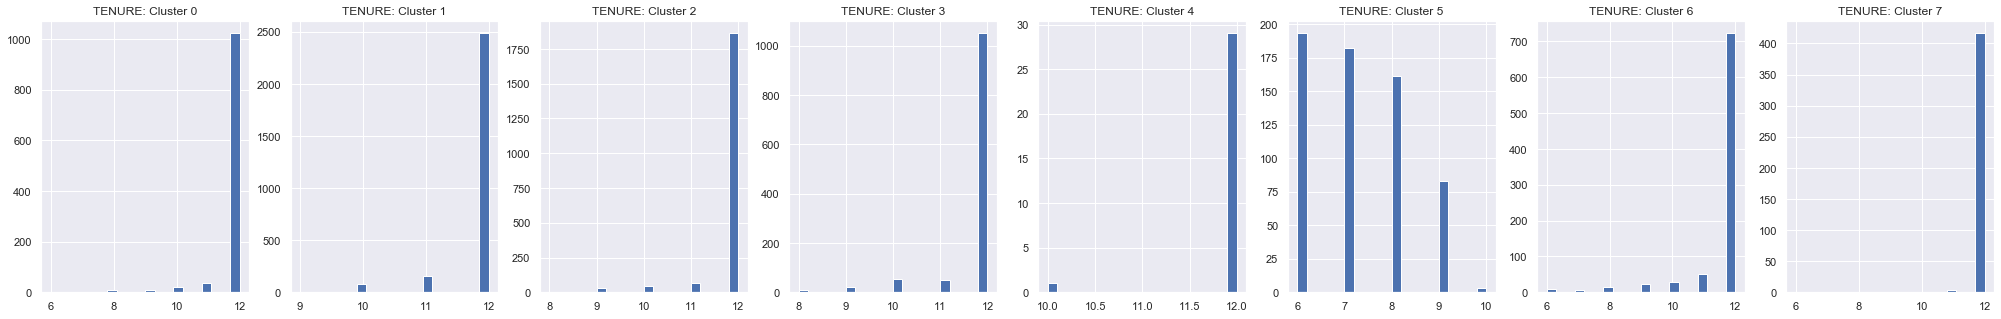

In [24]:
for col_ in credit_df.columns:
    plt.figure(figsize= (35,5))
    for n_clus in range(8):
        plt.subplot(1,8,n_clus+1)
        clusters = credit_cluster_df[credit_cluster_df['CLUSTERS']==n_clus]
        clusters[col_].hist(bins=20)
        plt.title('{}: Cluster {}'.format(col_,n_clus))
    plt.show()
        

## PCA

In [25]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credit_scaled_df)

In [26]:
pca_df =pd.DataFrame(data=principal_comp, columns =['pc1','pc2'])

In [27]:
pca_df.head()

,pc1,pc2
0,-1.682220,-1.076450
1,-1.138294,2.506485
2,0.969681,-0.383522
3,-0.873628,0.043169
4,-1.599434,-0.688581


In [28]:
pca_clusters_df = pd.concat([pca_df, pd.DataFrame({'Clusters':labels})], axis=1)

In [29]:
pca_clusters_df.head()

,pc1,pc2,Clusters
0,-1.682220,-1.076450,1
1,-1.138294,2.506485,6
2,0.969681,-0.383522,0
3,-0.873628,0.043169,1
4,-1.599434,-0.688581,1


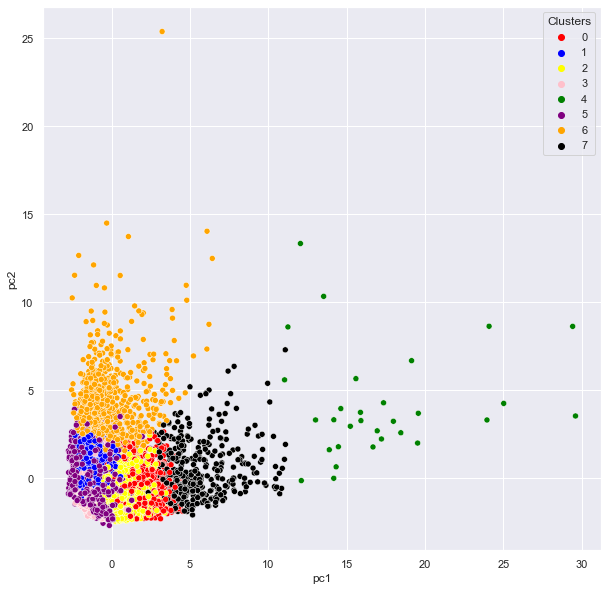

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pc1', y='pc2', hue='Clusters', data=pca_clusters_df, palette = ['red','blue','yellow','pink','green','purple','orange','black'])

## Autoencoders

In [33]:
input_df =Input(shape =(17,))

In [36]:
x = Dense(7, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(10, activation='relu', kernel_initializer= 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

In [37]:
autoencoder = Model(input_df,decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
autoencoder.fit(credit_scaled_df, credit_scaled_df, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 1s 17ms/step - loss: 0.5567
Epoch 2/25
70/70 [==============================] - 1s 18ms/step - loss: 0.2976
Epoch 3/25
70/70 [==============================] - 1s 17ms/step - loss: 0.2125
Epoch 4/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1800
Epoch 5/25
70/70 [==============================] - 1s 18ms/step - loss: 0.1581
Epoch 6/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1534
Epoch 7/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1365
Epoch 8/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1240
Epoch 9/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1143
Epoch 10/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1008
Epoch 11/25
70/70 [==============================] - 1s 17ms/step - loss: 0.0942
Epoch 12/25
70/70 [==============================] - 1s 17ms/step - loss: 0.0863
Epoch 13/25
70/70 [==================

In [40]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              22000 

In [41]:
pred = encoder.predict(credit_scaled_df)

In [43]:
pred.shape

(8950, 10)

### Elbow Method

Text(0.5, 1.0, 'No. of Clusters')

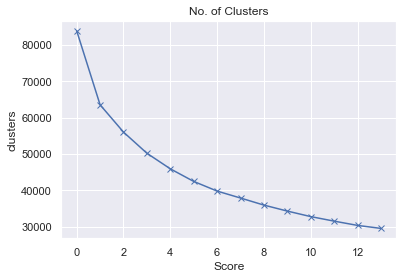

In [48]:
inertia_scr =[]
for i in range(1,15):
    kmeans =  KMeans(n_clusters = i)
    kmeans.fit(pred)
    inertia_scr.append(kmeans.inertia_)

plt.plot(inertia_scr, 'bx-')
plt.xlabel('Score')
plt.ylabel('clusters')
plt.title('No. of Clusters')

### KMeans

In [105]:
kmeans =KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [106]:
df_cluster_df =pd.concat([credit_df, pd.DataFrame({'Clusters': labels})], axis=1)

In [107]:
df_cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


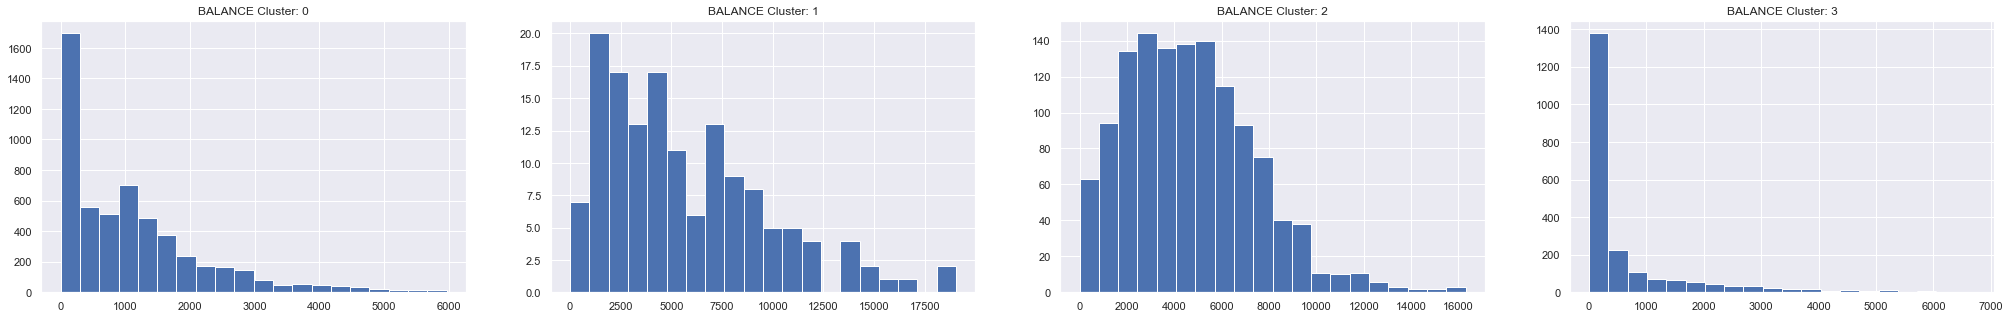

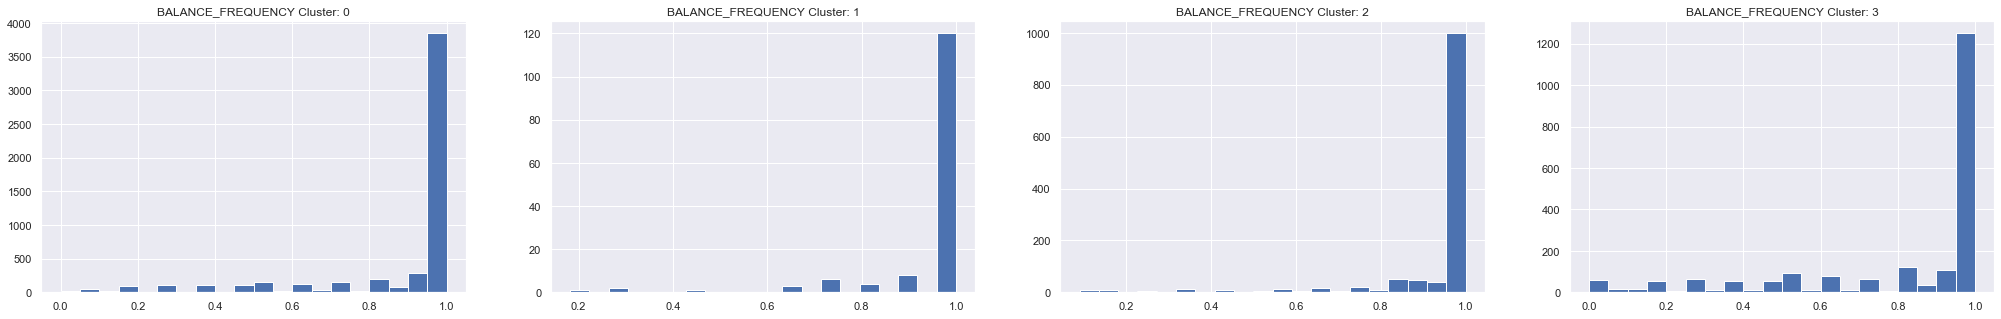

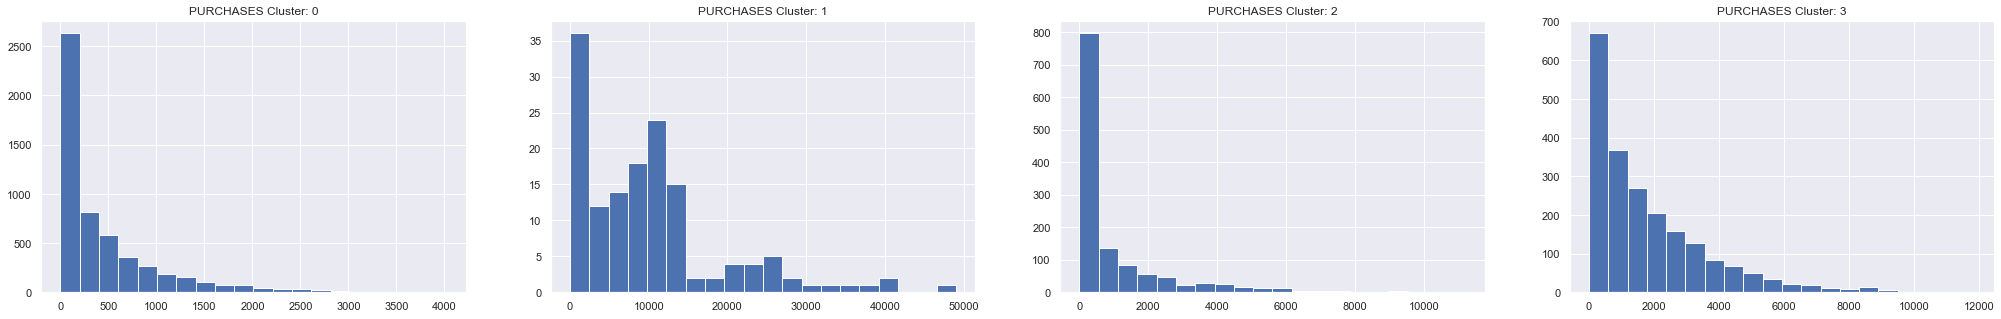

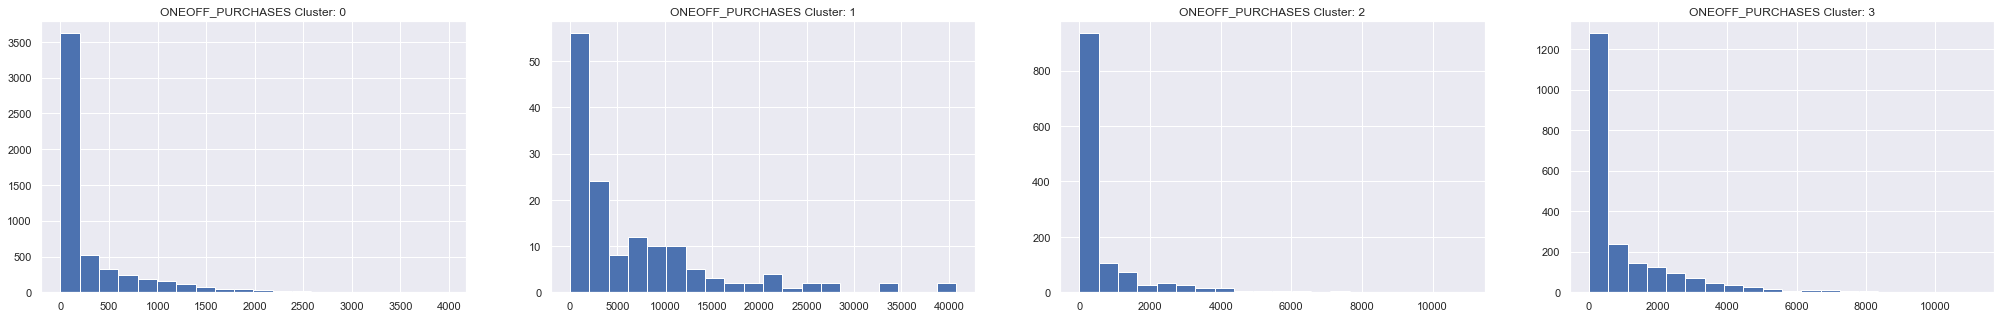

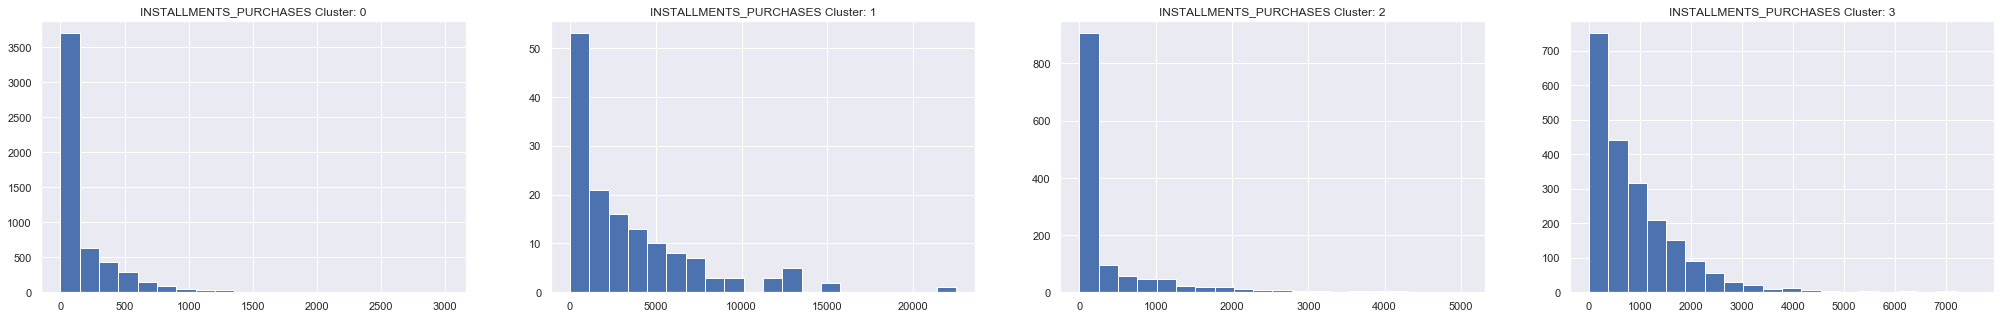

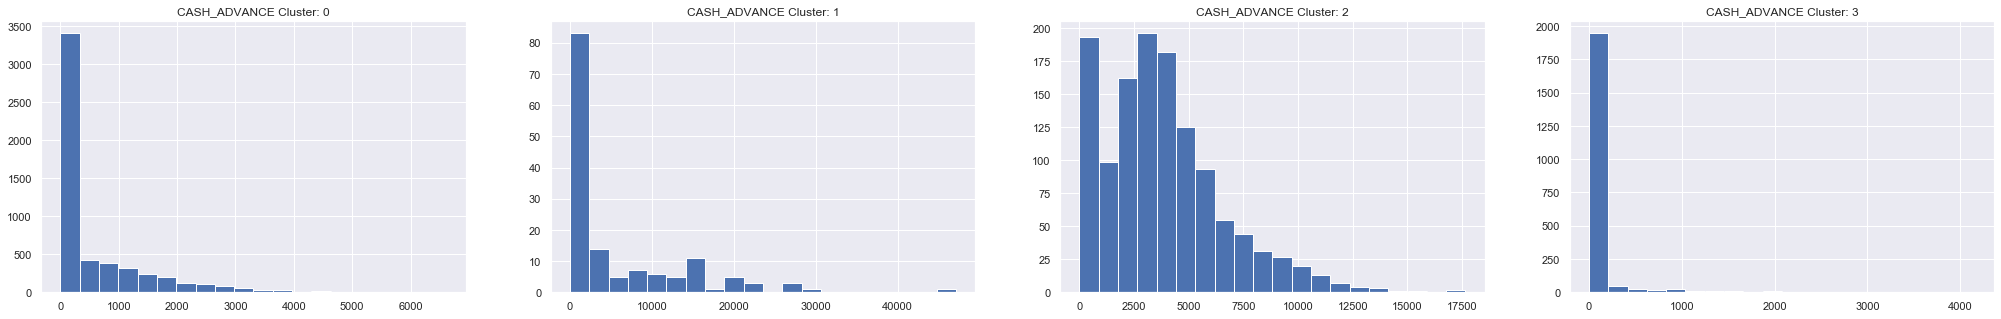

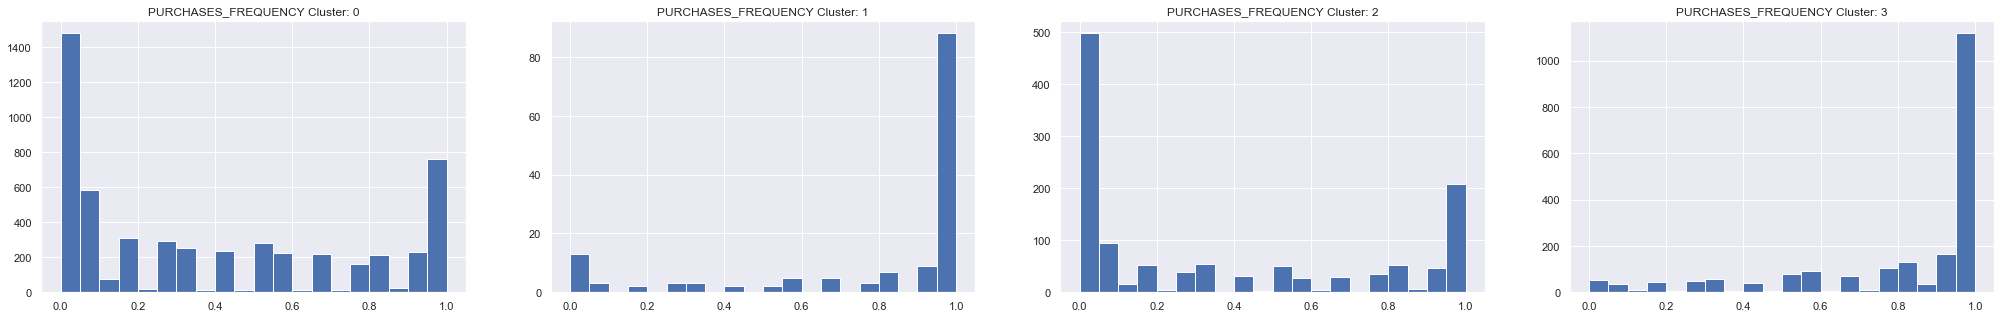

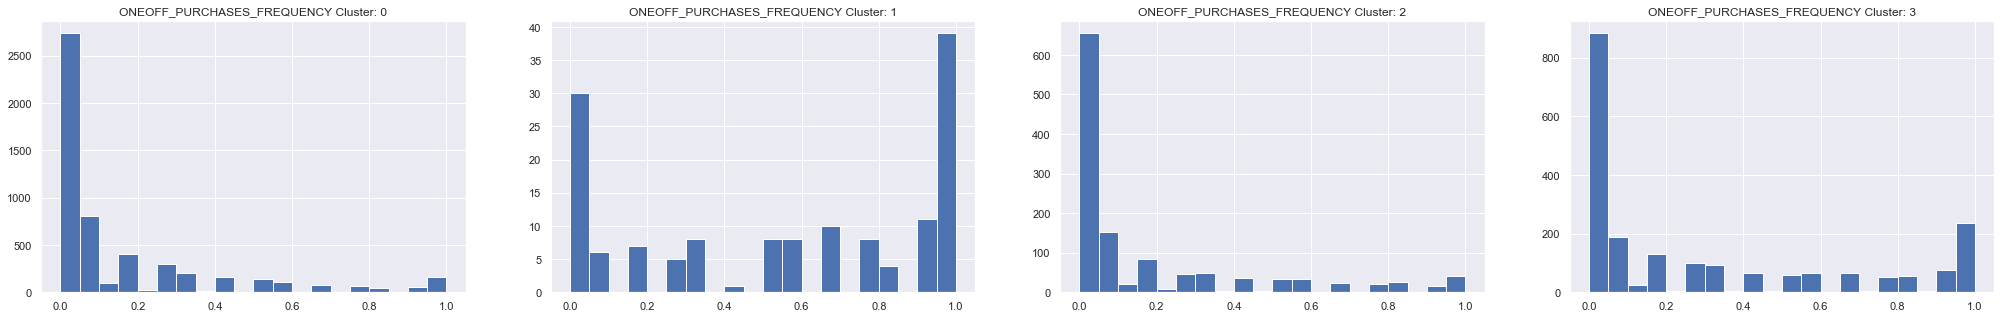

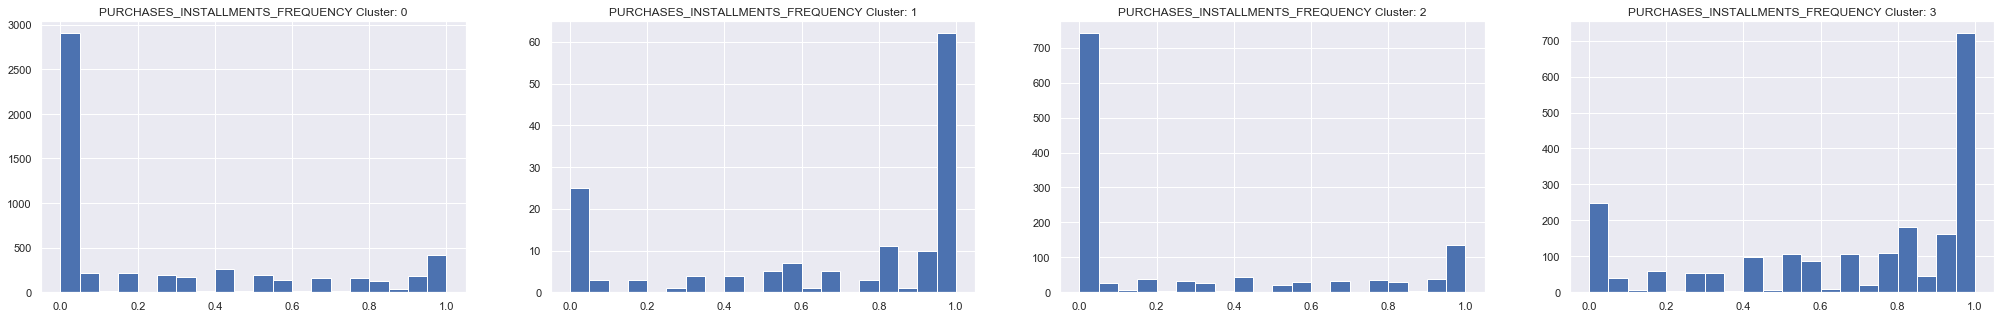

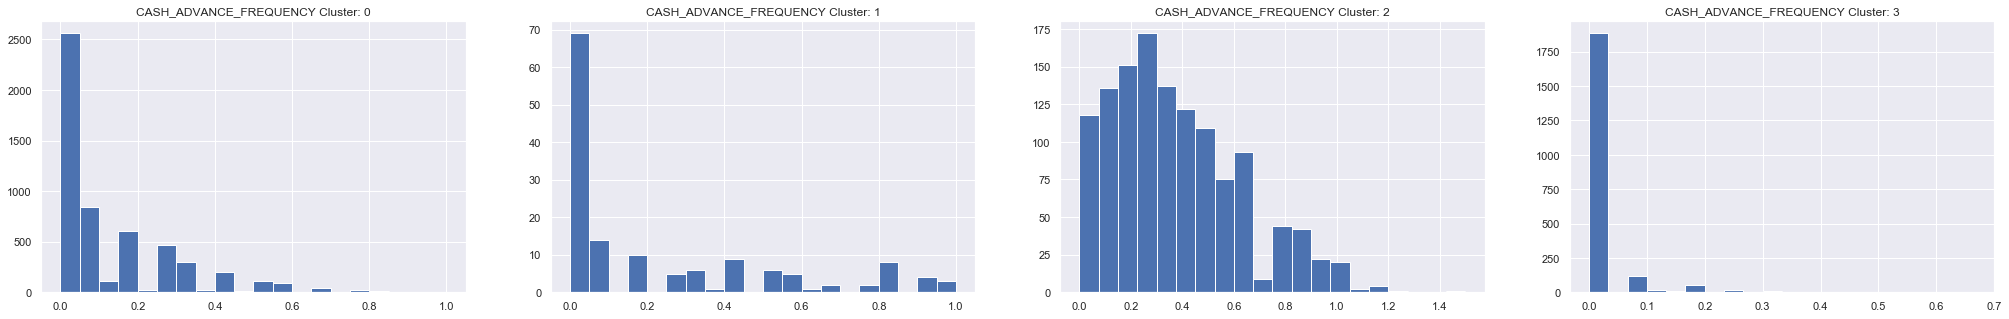

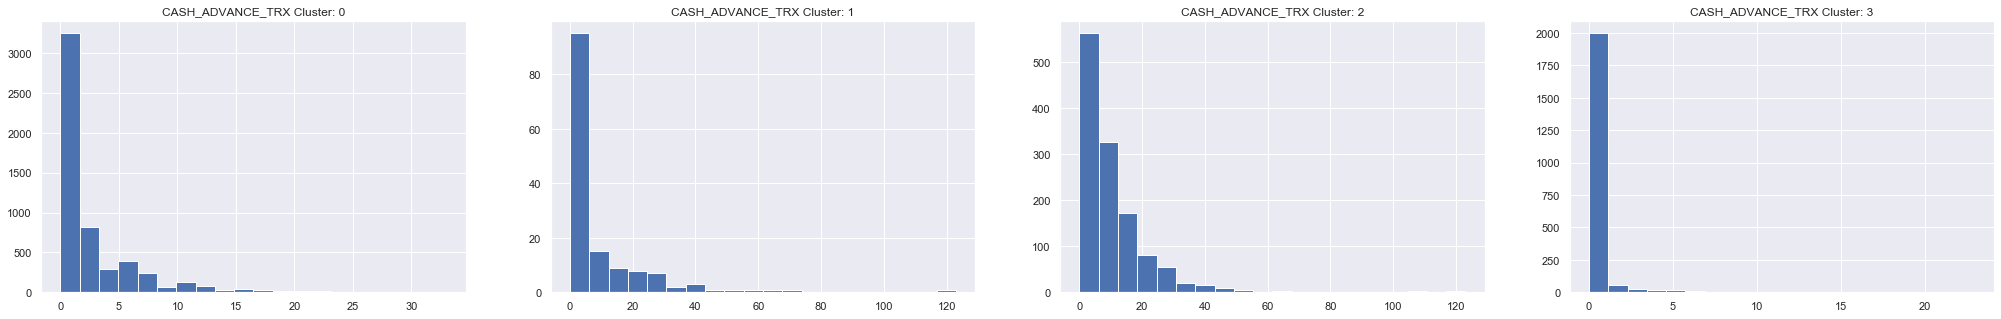

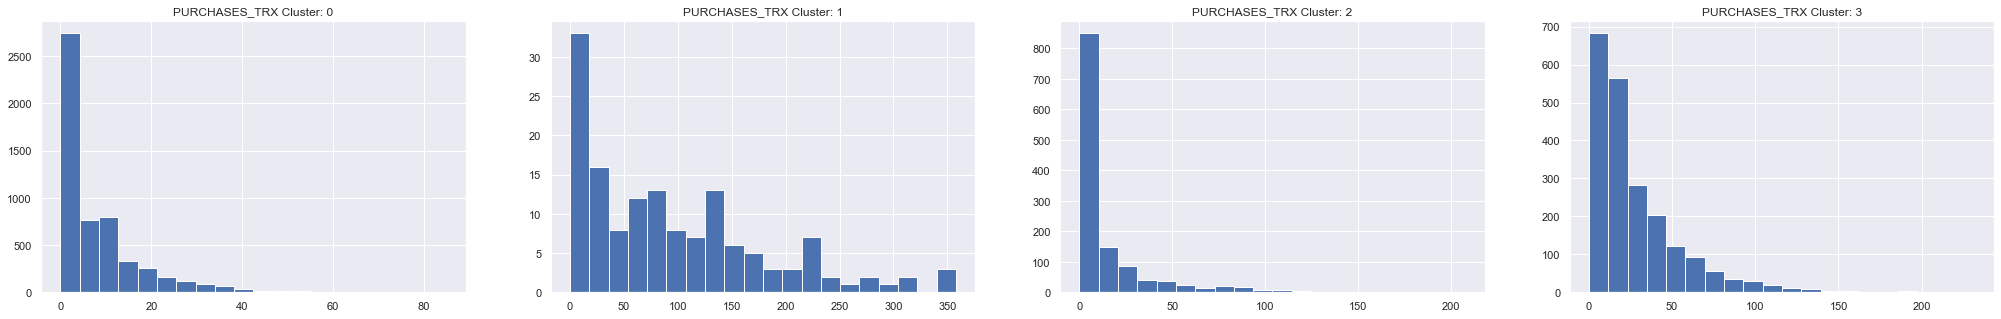

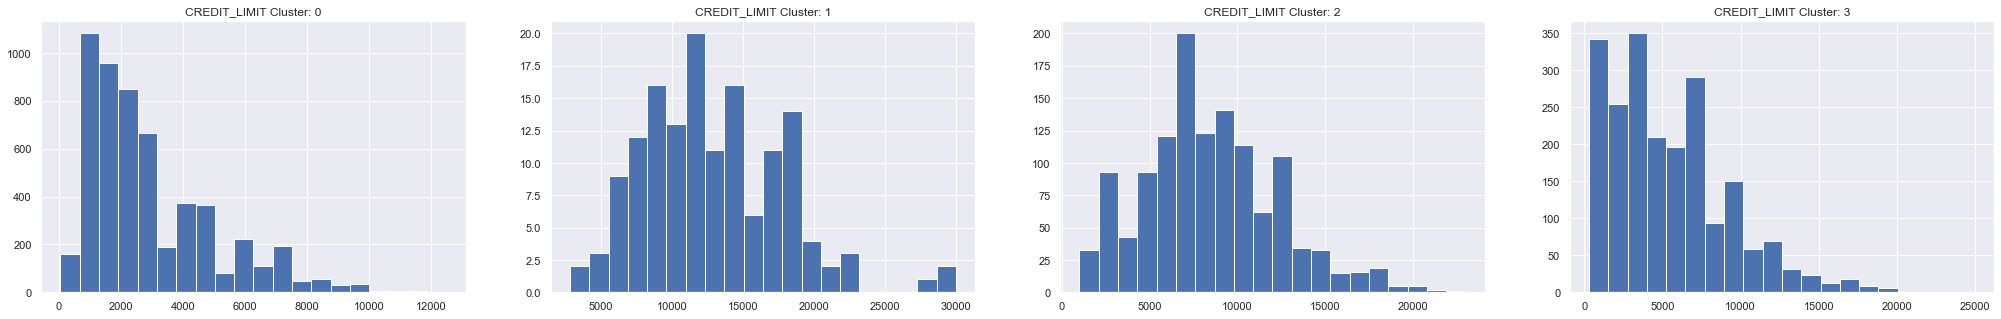

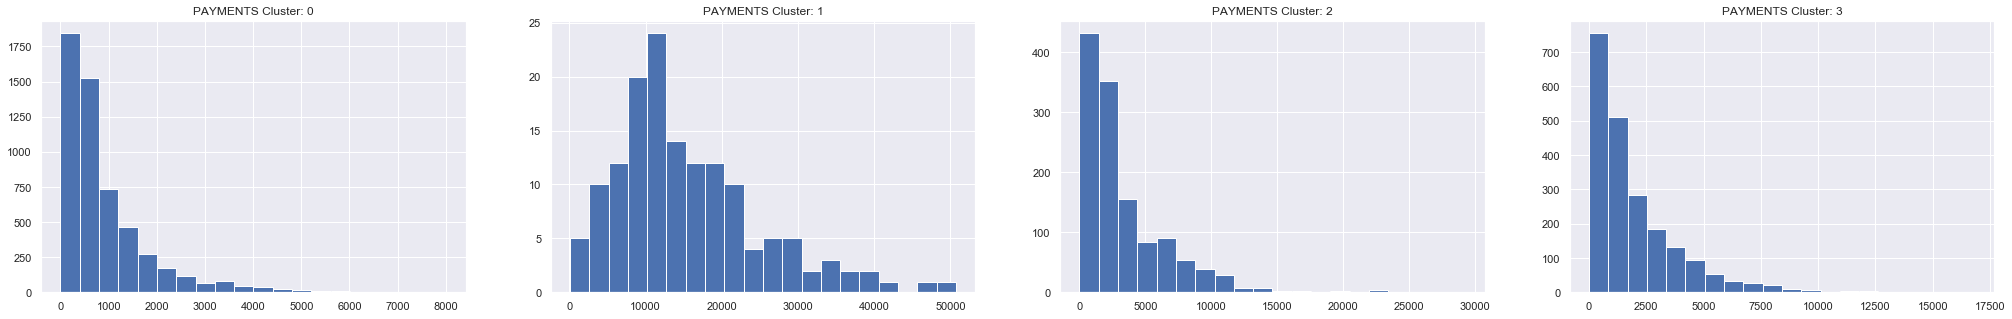

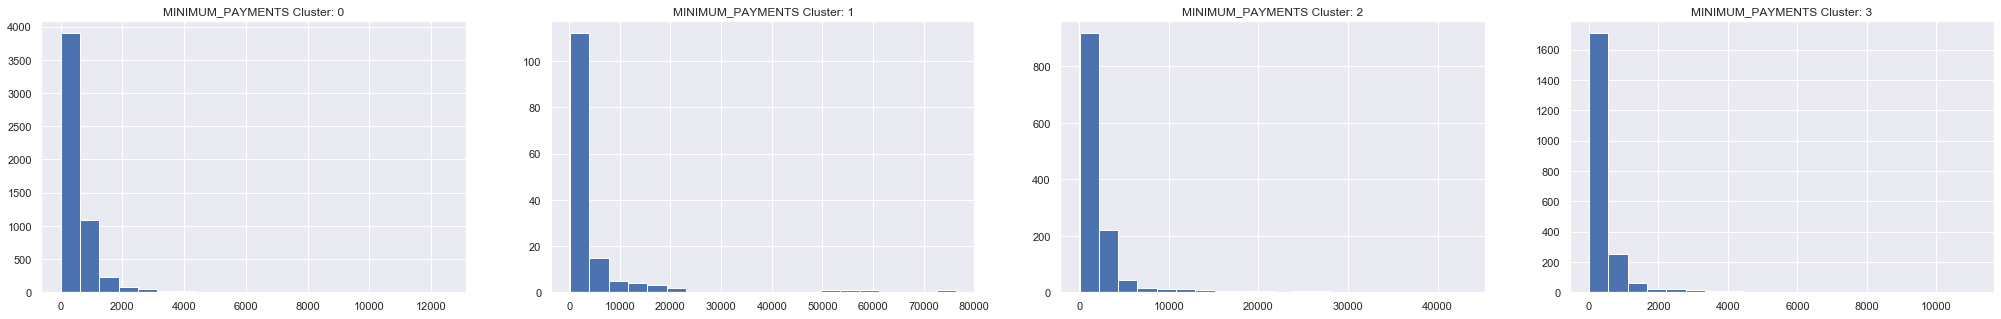

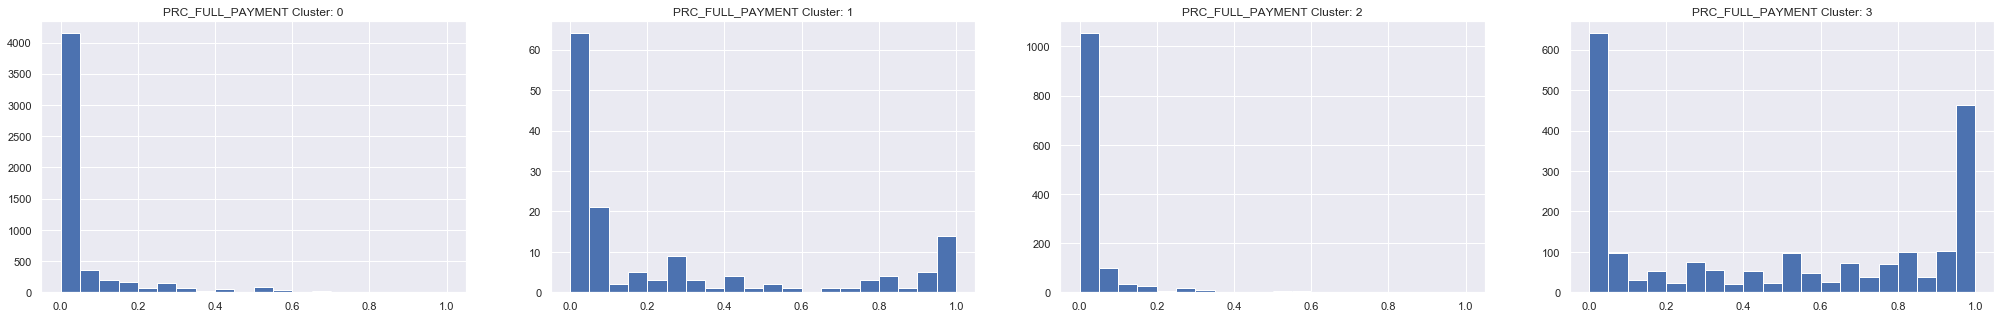

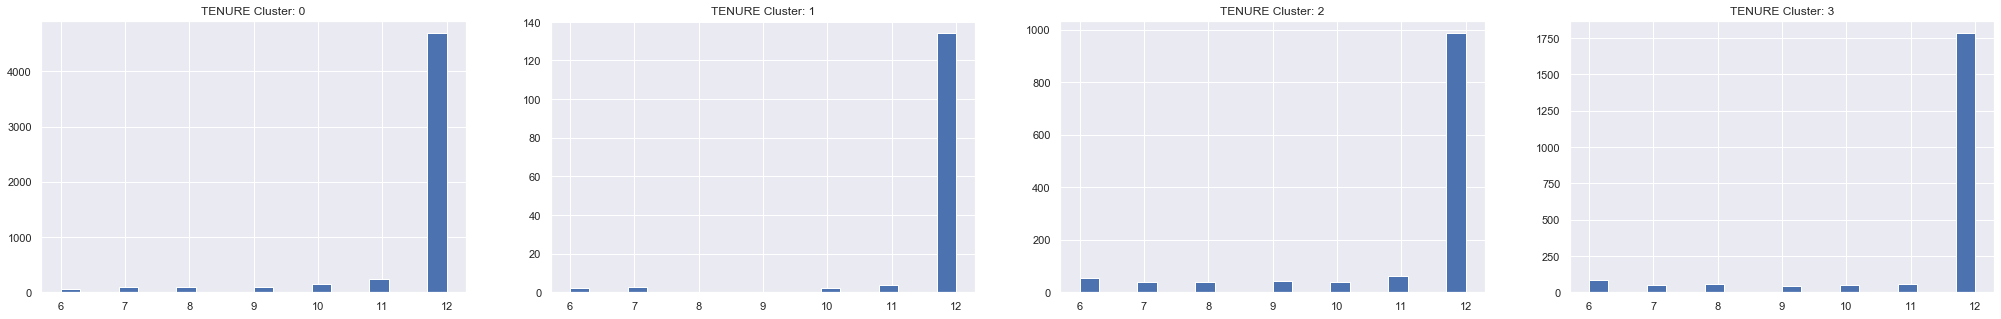

In [108]:
for col_n in credit_df.columns:
    plt.figure(figsize=(35,5))
    for i in range(4):
        plt.subplot(1,4,i+1)
        clusters = df_cluster_df[df_cluster_df['Clusters']==i]
        clusters[col_n].hist(bins=20)
        plt.title('{} Cluster: {}'.format(col_n,i))
    plt.show()

### PCA

In [119]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(pred)

In [120]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca_1','pca_2'])
pca_df = pd.concat([pca_df,pd.DataFrame({'Clusters':labels})], axis=1)

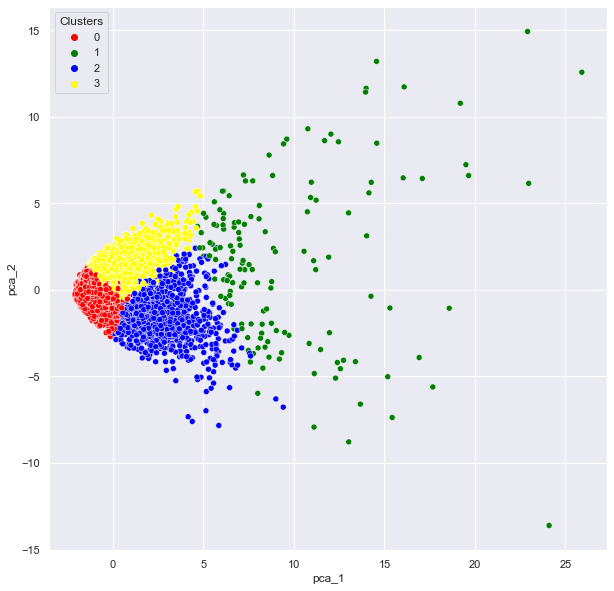

In [121]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca_1',y='pca_2', hue = 'Clusters', data = pca_df, palette = ['red','green', 'blue','yellow'])